Importing Libraries.

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble, metrics
import xgboost as xgb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

Importing Datasets and preprocessing of Data.

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0


In [ ]:
df.shape

(1066395, 6)

In [ ]:
df = df.sample(frac=0.1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106640 entries, 259607 to 166929
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   msno                106640 non-null  object 
 1   song_id             106640 non-null  object 
 2   source_system_tab   106323 non-null  object 
 3   source_screen_name  101760 non-null  object 
 4   source_type         106346 non-null  object 
 5   target              106640 non-null  float64
dtypes: float64(1), object(5)
memory usage: 5.7+ MB


In [ ]:
songs = pd.read_csv('/content/songs.csv')

In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1493394 entries, 0 to 1493393
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   song_id      1493394 non-null  object 
 1   song_length  1493393 non-null  float64
 2   genre_ids    1436069 non-null  object 
 3   artist_name  1493393 non-null  object 
 4   composer     804182 non-null   object 
 5   lyricist     246519 non-null   object 
 6   language     1493392 non-null  float64
dtypes: float64(2), object(5)
memory usage: 79.8+ MB


In [ ]:
df = pd.merge(df, songs, on='song_id', how='left')
del songs

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106640 entries, 0 to 106639
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   msno                106640 non-null  object 
 1   song_id             106640 non-null  object 
 2   source_system_tab   106323 non-null  object 
 3   source_screen_name  101760 non-null  object 
 4   source_type         106346 non-null  object 
 5   target              106640 non-null  float64
 6   song_length         96696 non-null   float64
 7   genre_ids           95235 non-null   object 
 8   artist_name         96696 non-null   object 
 9   composer            76116 non-null   object 
 10  lyricist            57024 non-null   object 
 11  language            96695 non-null   float64
dtypes: float64(3), object(9)
memory usage: 10.6+ MB


In [ ]:
members = pd.read_csv('members.csv')

In [ ]:
df = pd.merge(df, members, on='msno', how='left')
del members

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106640 entries, 0 to 106639
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    106640 non-null  object 
 1   song_id                 106640 non-null  object 
 2   source_system_tab       106323 non-null  object 
 3   source_screen_name      101760 non-null  object 
 4   source_type             106346 non-null  object 
 5   target                  106640 non-null  float64
 6   song_length             96696 non-null   float64
 7   genre_ids               95235 non-null   object 
 8   artist_name             96696 non-null   object 
 9   composer                76116 non-null   object 
 10  lyricist                57024 non-null   object 
 11  language                96695 non-null   float64
 12  city                    106640 non-null  int64  
 13  bd                      106640 non-null  int64  
 14  gender              

Replace NA

In [ ]:
for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106640 entries, 0 to 106639
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    106640 non-null  object 
 1   song_id                 106640 non-null  object 
 2   source_system_tab       106640 non-null  object 
 3   source_screen_name      106640 non-null  object 
 4   source_type             106640 non-null  object 
 5   target                  106640 non-null  float64
 6   song_length             106640 non-null  float64
 7   genre_ids               106640 non-null  object 
 8   artist_name             106640 non-null  object 
 9   composer                106640 non-null  object 
 10  lyricist                106640 non-null  object 
 11  language                106640 non-null  float64
 12  city                    106640 non-null  int64  
 13  bd                      106640 non-null  int64  
 14  gender              

Create dates

In [ ]:
df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day

# expiration_date
df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

In [ ]:
df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# Encoding categorical features
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

In [ ]:
df.corr()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
msno,1.000000,-0.003482,0.015984,-0.002401,-0.008278,0.009924,-0.001608,0.002953,-0.000244,0.006181,...,-0.011879,-0.002274,0.006473,0.033929,0.005126,0.018337,0.007384,0.014115,0.020065,0.000194
song_id,-0.003482,1.000000,0.000493,0.002898,-0.001107,-0.007066,-0.036781,0.036228,-0.016789,-0.028492,...,-0.000031,0.001601,-0.003757,0.000375,-0.003578,-0.001009,0.002644,-0.000257,-0.000621,0.000701
source_system_tab,0.015984,0.000493,1.000000,-0.054930,-0.101610,0.069997,0.016969,0.016360,0.018030,0.033902,...,-0.014535,0.026175,-0.031769,0.060645,-0.024561,-0.029357,0.011465,0.052376,-0.000214,0.016069
source_screen_name,-0.002401,0.002898,-0.054930,1.000000,0.359795,-0.074206,0.005691,-0.000763,0.004959,0.011044,...,0.027961,-0.029684,0.039891,-0.045011,0.036429,0.016594,-0.004889,-0.040077,0.009588,-0.003085
source_type,-0.008278,-0.001107,-0.101610,0.359795,1.000000,-0.152963,0.010124,-0.019825,-0.009523,-0.005096,...,0.016574,-0.012455,0.012713,-0.040387,0.010324,0.009691,0.004929,-0.042520,0.018539,-0.005435
target,0.009924,-0.007066,0.069997,-0.074206,-0.152963,1.000000,0.012973,-0.001121,0.016373,0.000826,...,-0.017382,0.012554,-0.001935,0.093531,-0.001252,-0.006804,0.003563,0.084600,-0.022115,0.019927
song_length,-0.001608,-0.036781,0.016969,0.005691,0.010124,0.012973,1.000000,-0.473024,0.025740,-0.031540,...,-0.000953,0.001995,-0.005401,0.012712,-0.004775,-0.006395,-0.006992,0.010636,-0.002619,0.000074
genre_ids,0.002953,0.036228,0.016360,-0.000763,-0.019825,-0.001121,-0.473024,1.000000,0.208014,0.222775,...,0.002934,0.003689,-0.000187,-0.004189,-0.000468,0.004396,0.001502,-0.002221,0.002732,0.004506
artist_name,-0.000244,-0.016789,0.018030,0.004959,-0.009523,0.016373,0.025740,0.208014,1.000000,0.353134,...,-0.005085,-0.000530,-0.007812,0.010958,-0.008646,0.006534,-0.007164,0.009984,-0.000545,0.003697
composer,0.006181,-0.028492,0.033902,0.011044,-0.005096,0.000826,-0.031540,0.222775,0.353134,1.000000,...,0.006158,-0.002948,-0.003373,0.007646,-0.003759,0.005318,-0.000261,0.006502,0.000648,0.003275


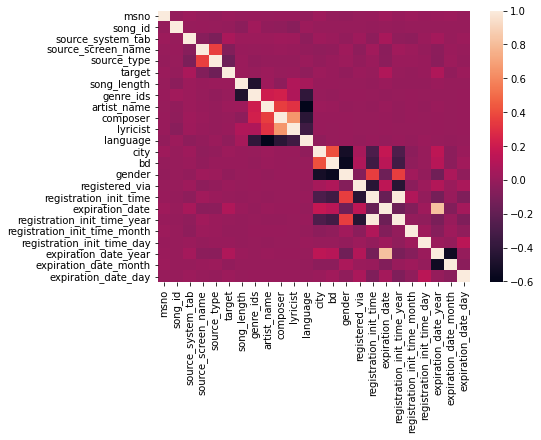

In [ ]:
plt.figure(figsize=[7,5])
sns.heatmap(df.corr())
plt.show()

Random forest model

In [ ]:
model = ensemble.RandomForestClassifier(n_estimators=250, max_depth=25)
model.fit(df[df.columns[df.columns != 'target']], df.target)

RandomForestClassifier(max_depth=25, n_estimators=250)

In [ ]:
df_plot = pd.DataFrame({'features': df.columns[df.columns != 'target'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

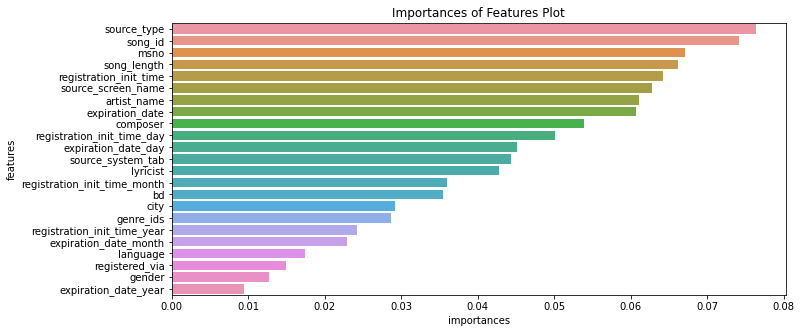

In [ ]:
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()

In [ ]:
model.feature_importances_

array([0.06713634, 0.07411715, 0.04441558, 0.0627698 , 0.07642743,
       0.06613125, 0.02866987, 0.06112272, 0.05392779, 0.04275949,
       0.01743465, 0.02917951, 0.03545773, 0.01268556, 0.01493659,
       0.06426163, 0.06072712, 0.02419965, 0.03597157, 0.05009   ,
       0.00943032, 0.02296188, 0.04518638])

In [ ]:
df = df.drop(df_plot.features[df_plot.importances < 0.04].tolist(), 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
list(df.columns)

['msno',
 'song_id',
 'source_system_tab',
 'source_screen_name',
 'source_type',
 'target',
 'song_length',
 'artist_name',
 'composer',
 'lyricist',
 'registration_init_time',
 'expiration_date',
 'registration_init_time_day',
 'expiration_date_day']

In [ ]:
target = df.pop('target')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(df, target, test_size = 0.3)
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=250)
model.fit(train_data, train_labels)

XGBClassifier(max_depth=15, min_child_weight=5, n_estimators=250)

In [ ]:
predict_labels = model.predict(test_data)
print(metrics.classification_report(test_labels, predict_labels))

              precision    recall  f1-score   support

         0.0       0.66      0.45      0.53      9959
         1.0       0.78      0.89      0.83     22033

    accuracy                           0.76     31992
   macro avg       0.72      0.67      0.68     31992
weighted avg       0.74      0.76      0.74     31992



**Conclusion**

By using Random Forest Classifier we get accuracy of music recommendation system as 76%.